# Fruit Identification

# Essential Purpose
Skills tested: using Pandas to read and explore the dataset.

Using Scikit-Learn for splitting your dataset.

Using Keras to build your convolutional neural network.

Training your convolutional neural network (CNN) for image classification.

In this mini project, you will use a dataset with images of fruits and vegetables to train a CNN-based classifier to identify the item in the image.
The dataset consists of 72,325 RGB images of 105 fruits and vegetables, divided into 54,072 images for training and 18,150 images for testing. Each folder holds images of the same fruit, while each image has only one item.
License: the dataset is created and provided by Mihai Oltean under CC BY-SA 4.0 license.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.

# Expected Output
By the end of this mini project, you are supposed to deliver within your code:
    
The summary of the neural network used using model.summary().

The accuracy measure for the testing data.

A printed confusion matrix for testing data predictions.

You are expected to write around 35 lines of code to complete this project.

In [1]:
# download and read the data
# split into 70% train and 30% test
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
training_set=train_datagen.flow_from_directory('C:/Users/Douglas/kaggle_data/fruits-360_dataset/fruits-360/Training', 
                                               target_size=(100,100),batch_size=32, class_mode='categorical', shuffle=True)


Found 67692 images belonging to 131 classes.


In [4]:
testing_set=test_datagen.flow_from_directory('C:/Users/Douglas/kaggle_data/fruits-360_dataset/fruits-360/Test', 
                                               target_size=(100,100),batch_size=32, class_mode='categorical', shuffle=False)

Found 22688 images belonging to 131 classes.


# Define Your Convolutional Neural Network
Define a CNN with the following layers:

The input layer is a 2-D convolutional layer with the following parameters:

16 units;

convolution window size: 2x2;

activation function: ReLU; and

input shape: 100x100x3

Define a 2D max pooling layer with pool size of 2x2.

Define a 2D convolutional layer with the following parameters:

32 units;

convolution window size: 2x2;

activation function: ReLU; and

a 2-D max pooling layer with pool size of 2x2.

Define two 2-D convolutional layers, each with the following parameters:

64 units;

convolution window size: 2x2;

activation function: ReLU;

a 2D max pooling layer with pool size of 2x2;

a dropout layer with 0.3 rate; and

A flattening layer.

Define a fully-connected layer with:

150 units;

activation function: ReLU; and

a Dropout layer with a 0.4 rate.

The output layer is a fully connected layer with:

81 units and

activation function: softmax.

In [10]:
classifier=Sequential()
classifier.add(Conv2D(16, (2,2), input_shape= (100,100,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32, (2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64, (2,2), activation='relu'))
classifier.add(Conv2D(64, (2,2), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))
classifier.add(Flatten())
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=131, activation='softmax'))

In [11]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        2080      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 23, 23, 64)        8256      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 64)       

# Choosing Hyperparameters
Build the network using the following parameters:

Optimizer: rmsprop

Loss function: categorical_crossentropy

Metrics: accuracy

Batch size: 32

Epochs: 30

In [12]:
classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Network
Use Keras to implement the network described and train your data.

Classification metrics:

Print the accuracy measure on the testing data.

Print the confusion matrix of the testing data.

In [18]:
cnn=classifier.fit_generator(generator=training_set, steps_per_epoch=100, epochs=5, validation_data=testing_set, validation_steps=100)

C:\Users\Douglas\AppData\Local\Temp/ipykernel_9348/2460410584.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn=classifier.fit_generator(generator=training_set, steps_per_epoch=100, epochs=5, validation_data=testing_set, validation_steps=100)


Epoch 1/5
100/100 [==============================] - 79s 789ms/step - loss: 2.0129 - accuracy: 0.4141 - val_loss: 1.7209 - val_accuracy: 0.4309
Epoch 2/5
100/100 [==============================] - 67s 670ms/step - loss: 1.7027 - accuracy: 0.4925 - val_loss: 1.0238 - val_accuracy: 0.7509
Epoch 3/5
100/100 [==============================] - 65s 649ms/step - loss: 1.5201 - accuracy: 0.5394 - val_loss: 0.9954 - val_accuracy: 0.6919
Epoch 4/5
100/100 [==============================] - 65s 648ms/step - loss: 1.2853 - accuracy: 0.5872 - val_loss: 0.8548 - val_accuracy: 0.7366
Epoch 5/5
100/100 [==============================] - 68s 682ms/step - loss: 1.1589 - accuracy: 0.6416 - val_loss: 1.0366 - val_accuracy: 0.6237


In [19]:
cnn.history

{'loss': [2.01287841796875,
  1.7026758193969727,
  1.5201181173324585,
  1.2853432893753052,
  1.158890962600708],
 'accuracy': [0.4140625,
  0.4925000071525574,
  0.5393750071525574,
  0.5871875286102295,
  0.6415625214576721],
 'val_loss': [1.7209420204162598,
  1.023796558380127,
  0.9953732490539551,
  0.8547954559326172,
  1.0365791320800781],
 'val_accuracy': [0.4309374988079071,
  0.7509375214576721,
  0.6918749809265137,
  0.7365624904632568,
  0.6237499713897705]}

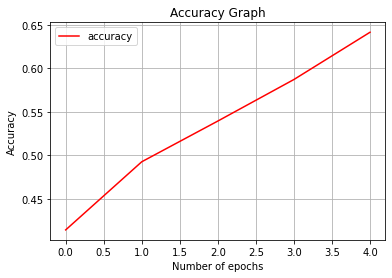

In [20]:
plt.plot(cnn.history["accuracy"], color='r', label='accuracy')
plt.title("Accuracy Graph")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.grid()
plt.show()

In [21]:
test_labels=testing_set.labels

In [22]:
predictions=classifier.predict(testing_set)

In [23]:
import numpy as np
predict_labels=np.argmax(predictions, axis=-1)

In [24]:
#use a print array to print the confusion matrix
from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf)

print("Confusion matrix: \n",confusion_matrix(test_labels, predict_labels))


Confusion matrix: 
 [[164   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   8   0   0   0   0   0   0   0   0   0   0   0

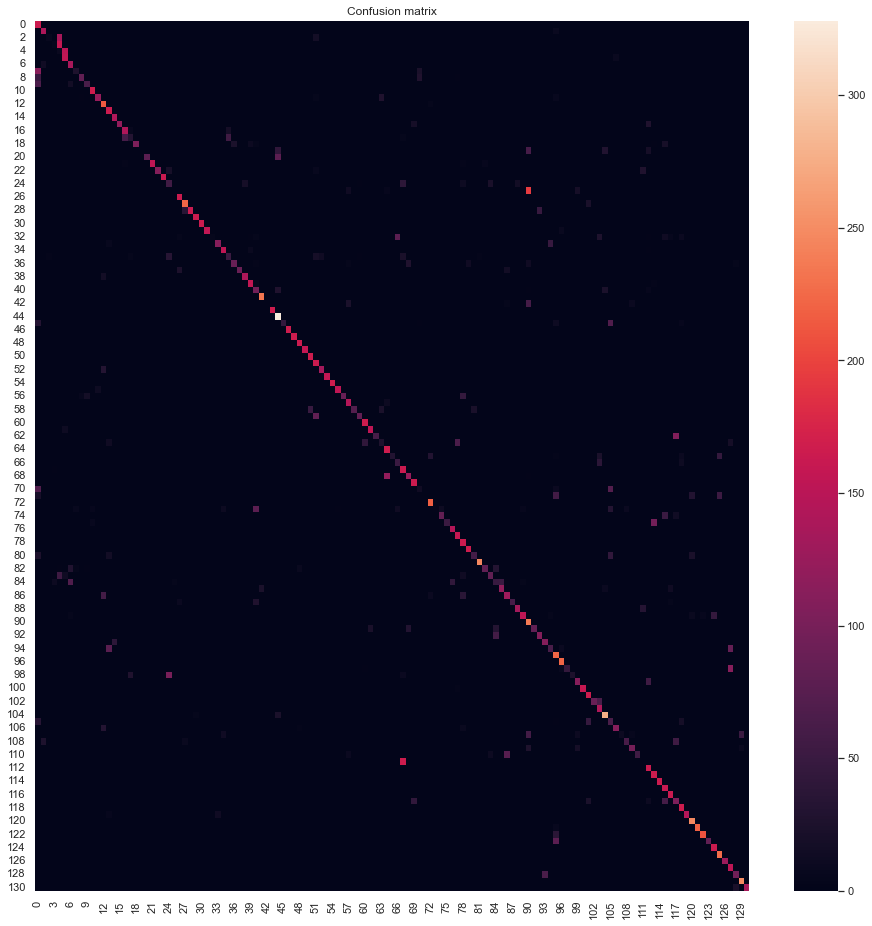

In [42]:
#use a heatmap to plot
import seaborn as sns

sns.set(font_scale=1.0)
plt.figure(figsize=(16,16))
CM = confusion_matrix(test_labels, predict_labels)
ax=plt.axes()

sns.heatmap (CM)

#, annot=True, 
#             annot_kws={"size":10}, 
#             fmt="d",
#             xticklabels=range(0,131), 
#             yticklabels(0,131), ax = ax)

ax.set_title('Confusion matrix')
plt.show()